C:\Users\gorar\anaconda3\lib\site-packages\numpy\lib\function_base.py:3238: RuntimeWarning: invalid value encountered in sqrt
  return i0(beta * sqrt(1-((n-alpha)/alpha)**2.0))/i0(float(beta))
C:\Users\gorar\anaconda3\lib\site-packages\numpy\lib\function_base.py:3107: RuntimeWarning: invalid value encountered in less_equal
  return piecewise(x, [x <= 8.0], [_i0_1, _i0_2])


0      6.3
1     10.0
2     11.2
3      5.0
4      8.8
5      5.0
6      8.8
7     20.0
8      7.5
9      6.3
10     6.3
11     5.0
12    11.2
13     8.8
14    21.3
15    11.2
16    10.0
17    10.0
18    10.0
19    12.5
20    15.0
21     6.3
22     8.8
23    13.7
24     7.5
25    11.2
26     8.8
27    18.8
28    15.0
Name: data, dtype: float64
[array([0.08848053, 0.48011095, 0.90012349, 0.97021728, 0.62181978,
       0.1818432 ,        nan]), array([0.08848053, 0.29425961, 0.56437221, 0.82160913, 0.97885093,
       0.97885093, 0.82160913, 0.56437221, 0.29425961, 0.08848053]), array([0.08848053, 0.26555856, 0.49866422, 0.7379982 , 0.92207715,
       0.99933618, 0.94730695, 0.78116882, 0.54796068, 0.30896941,
       0.11786035,        nan]), array([0.08848053, 0.63343178, 1.        , 0.63343178, 0.08848053]), array([0.08848053, 0.33319561, 0.64910899, 0.91119147, 0.99886502,
       0.86960598, 0.58576816, 0.27538084,        nan]), array([0.08848053, 0.63343178, 1.        , 0.63343178, 0.

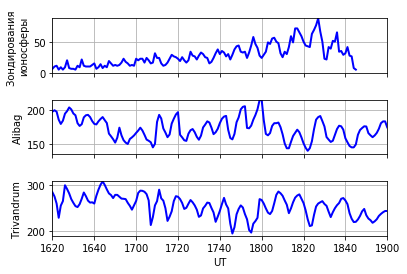

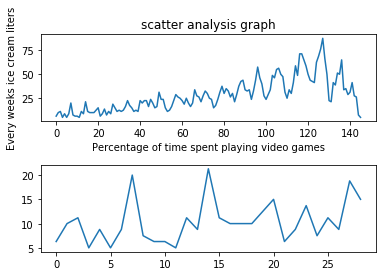

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import traceback
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
import matplotlib.ticker as ticker
import datetime
from scipy.fftpack import fft
from math import pi
from sklearn.utils import shuffle

data_A = pd.read_csv('C:/Users/gorar/Desktop/w1/data/AH910324.DAT', names=['data'])
data_I = pd.read_csv('C:/Users/gorar/Desktop/w1/data/IV910324.DAT', names=['data'])
data_T = pd.read_csv('C:/Users/gorar/Desktop/w1/data/TH910324.DAT', names=['data'])


L_A = len(data_A)
L_I = len(data_I)
L_T = len(data_T)


start_time = "16:20"
finish_time = "19:00"

array_time = pd.date_range(start_time, finish_time, freq="1min").time
L_AT = len(array_time)
tim = []

for y in range(L_AT):
    time_H = array_time[y].strftime('%H')
    time_M = array_time[y].strftime('%M')
    M_H = str(time_H + time_M)
    tim.append (M_H)


fig_data = plt.figure()

x_A = list(range(0, L_A))
x_I = list(range(0, L_I))
x_T = list(range(0, L_T))

subplot_data_A = fig_data.add_subplot(312)

subplot_data_A.set_xticklabels('')
subplot_data_A.set_ylabel(u'Alibag')

max_A = max(data_A['data'])
min_A = min(data_A['data'])
min_A_border = min_A-5

plt.axis([0,160, min_A_border, max_A])
line_data_A = subplot_data_A.plot(x_A, data_A, '-', color='blue', linewidth=2)


subplot_data_I = fig_data.add_subplot(311)
subplot_data_I.set_ylabel(u'Зондирования \n'  'ионосферы')

rcParams['figure.subplot.hspace'] = 0.5

max_I = max(data_I['data'])

plt.axis([0,160, 0, max_I])
subplot_data_I.set_xticklabels('')

line_data_I = subplot_data_I.plot(x_I, data_I, '-', color='blue', linewidth=2)



subplot_data_T = fig_data.add_subplot(313)
subplot_data_T.set_ylabel(u'Trivandrum')
subplot_data_T.set_xlabel(u'UT')

max_T = max(data_T['data'])
min_T = min(data_T['data'])
min_T_border = min_T - 5

plt.axis([0,160, min_T_border, max_T])

subplot_data_T.xaxis.set_major_locator(ticker.MultipleLocator(20))

line_data_T = subplot_data_T.plot(tim, data_T, '-', color='blue', linewidth=2)

for ax in fig_data.axes:
    ax.grid(True)
    

path = 'C:/Users/gorar/Desktop/w1/graf'
try:  
    fig_data.savefig(path)
except: 
    print('Ошибка. Введите путь сохранения и имя файла')
    path = input('')
    fig_data.savefig(path)


fig_fft = plt.figure()
fft_data_I = fft(data_I)

subplot_fft_I = fig_fft.add_subplot(211)

devider_I, data_I = find_opt(data_I)

u = 0 

fft_I_smoothed = add_fft(devider_I, data_I)

subplot_fft_I.set_title('scatter analysis graph')
subplot_fft_I.set_xlabel('Percentage of time spent playing video games')
subplot_fft_I.set_ylabel('Every weeks ice cream liters')
       
line_fft_I = subplot_fft_I.plot(abs(fft_data_I))

subplot_fft_I_smoothed = fig_fft.add_subplot(212)

line_fft_I_smoothed = subplot_fft_I_smoothed.plot(abs(fft_I_smoothed))

In [62]:
def add_fft (divider, data):
    
    data_fft = 0
    len_data = int(len(data))
    
    for k in range(divider):
        kk = k+1
        start_ = int(k*(len_data/divider))
        end_ = int(kk*(len_data/divider))
        data_divided = data_I[start_:end_]
        kaiser_data = kaiser_window(data_divided['data'], 4)
        data_fft_divided = fft(data_divided)
        data_fft = data_fft + data_fft_divided
        if kk == divider:
            data_fft = data_fft/divider
            
        return data_fft

In [66]:
def find_opt(data):
    
    len_data = int(len(data))
    
    if len_data/5 == round(len_data/5):
        divider = 5  
    elif len_data/4 == round(len_data/4):
        divider = 4  
    else:
        modulo_5 = len_data%5
        modulo_4 = len_data%4
        
        if modulo_5<=modulo_4:
            data = data[0:(len_data-modulo_5)]
            divider = 5
        else:
            data = data[0:(len_data-modulo_4)]
            divider = 4
            
    return divider, data

In [72]:
def kaiser_window(data, beta):
    len_data = len(data)
    kaiser_data = []
    for i in range(len_data):
        data_i = data[i]
        data_i_window = np.kaiser(data_i, beta)
        kaiser_data.append(data_i_window)
    print(data)
    print(kaiser_data)
    return kaiser_data